# Analyzing Website User Experience (UX)

The Higher Education Supplementary Grant (HESG) is a government-funded program that allows students enrolled in higher education to apply for grants, bursaries, and rebates. The HESG program requires students to register themselves on the Department for Student Support (DSS) website. In the past, many students had issues with the website's application process. The website had high drop-out rates and numerous complaints were made by users. Thus, changes were made intended to improve user experience (UX). The goal was to increase successful submissions and reduce the drop-out rate. 

The purpose of this project is to analyze the results of the website change. I will analyze the outcomes (i.e. successful submissions and drop-outs) of the new application process and compare it to the outcomes of the original application process. Finally, I will make recommendations about how the website can be further improved.

##   
## Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##  
## Data

The data set contains login information from 5847 DSS website sessions collected from [Forage](https://www.theforage.com/virtual-internships/prototype/rMSFymzsPCwMGRun8/Accenture-Virtual-Experience-Program). The information includes the **login date**, the **student ID**, the student's **university**, the **duration** of the session, whether the **session timed out** due to inactivity, the number of **documents uploaded**, the document(s) **file size**, and whether the user **submitted**.

In [2]:
login_df = pd.read_excel('M3+Individual+Login+Data+vFinal.xlsx')
login_df

,Log-In date,Student login ID,University,Logged-in duration,Timed out due to dormancy,Documents Uploaded (Number),"Documents Uploaded (file size, Mb)",Submission
0,2019-05-01,6563,TSU,01:38:17,No,0,0.000000,No
1,2019-05-01,23287,RU,00:50:44,Yes,0,0.000000,No
2,2019-05-01,82074664,ILU,01:03:12,Yes,4,13.821880,Yes
3,2019-05-01,426932,Le Dean College,00:36:27,Yes,1,12.936001,Yes
4,2019-05-01,42189,RU,00:47:21,No,2,9.263213,Yes
...,...,...,...,...,...,...,...,...
5842,2019-06-14,2119467307,Guardian College,01:10:28,No,10,17.142857,Yes
5843,2019-06-14,24515,RU,01:14:41,No,7,18.000000,Yes
5844,2019-06-14,372221,Le Dean College,00:22:31,No,5,16.571429,Yes
5845,2019-06-14,36347917,ILU,00:49:05,No,4,20.000000,Yes


The change to the application process occurred on June 8th, 2019. Thus, I will split the data into two sets: pre-update (before June 8th, 2019) and post-update (June 8th, 2019 and onwards). 

In [3]:
# Divide data into pre-website change and post-website change
pre_update = login_df[login_df['Log-In date'] <= '2019-06-07']
post_update = login_df[login_df['Log-In date'] > '2019-06-07']

#   
## Exploratory Data Analysis (EDA) 

In [4]:
post_update['Student login ID '].nunique()

701

Since the website change went live on June 8th, 701 students have logged onto the site.

****
**Did successful submissions increase since the website change?**

In [5]:
# Calculate average number of successful submissions prior to website change
pre_update[pre_update['Submission'] == 'Yes'].groupby('Log-In date')['Submission'].count().mean()

59.921052631578945

In [6]:
# Calculate average number of successful submissions post website change
post_update[post_update['Submission'] == 'Yes'].groupby('Log-In date')['Submission'].count().mean()

110.14285714285714

Since the website change, the number of successful submissions has nearly doubled - average of 60 per day to 110 per day. 
   

In [7]:
# Number of successful submissions by date
submissions_by_date = login_df[login_df['Submission'] == 'Yes'
                              ].groupby('Log-In date')['Submission'].count()

Text(0, 0.5, 'Number of Successful Submissions')

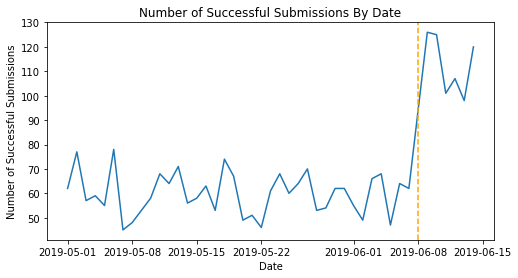

In [8]:
# Line graph showing successful submissions by date
plt.figure(figsize=(8,4))
plt.title("Number of Successful Submissions By Date")
sns.lineplot(data=submissions_by_date)
plt.axvline('2019-06-08', color = 'orange', linestyle = '--')
plt.xlabel("Date")
plt.ylabel("Number of Successful Submissions")

As you can see, the number of successful submissions has significantly increased since the website change on June 8th, 2019.

****   
**Did website timeouts decrease since the website change?**

In [9]:
# Calculate average number of timeouts prior to website change
pre_update[pre_update['Timed out due to dormancy'] == 'Yes'
          ].groupby('Log-In date')['Timed out due to dormancy'].count().mean()

64.65789473684211

In [10]:
# Calculate average number of timeouts post website change
post_update[post_update['Timed out due to dormancy'] == 'Yes'
           ].groupby('Log-In date')['Timed out due to dormancy'].count().mean()

20.142857142857142

Since the website change, the number of timeouts has decreased significantly - average of 65 per day to 20 per day. 

In [11]:
# Number of timeouts by date
timeouts_by_date = login_df[login_df['Timed out due to dormancy'] == 'Yes'
                           ].groupby('Log-In date')['Timed out due to dormancy'].count()

Text(0, 0.5, 'Number of Timeouts')

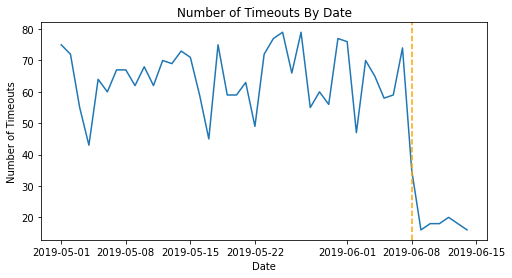

In [12]:
# Line graph showing timeouts by date
plt.figure(figsize=(8,4))
plt.title("Number of Timeouts By Date")
sns.lineplot(data=timeouts_by_date)
plt.axvline('2019-06-08', color = 'orange', linestyle = '--')
plt.xlabel("Date")
plt.ylabel("Number of Timeouts")

Clearly, the number of timeouts has significantly decreased since the website change. 

Next, I will analyze how the website change has impacted the various universities. However, prior to performing the analysis, I will have to do some data cleaning.

##  
## Data Cleaning 

In [13]:
# Check missing values
login_df.isnull().sum()

Log-In date                           0
Student login ID                      0
University                            0
Logged-in duration                    0
Timed out due to dormancy             0
Documents Uploaded (Number)           0
Documents Uploaded (file size, Mb)    0
Submission                            0
dtype: int64

There are no missing values. However, there are numerous inconsistent university data entries that I will need to standardize prior to analysis.

In [14]:
# All universities in data set
login_df['University'].unique()

array(['TSU', 'RU', 'ILU', 'Le Dean College', 'Guardian College', 'GCLU',
       'ACBU', 'University of Alpha November', 'Los Maryon University',
       'Greenwhale Coastal Local University', 'Il Loco University',
       'Australian Central Business University',
       'Terriwal Science University',
       'Greenwhale Costal Local University', 'Royal University', 'UAN'],
      dtype=object)

In [15]:
# Successful submissions by university post website change
post_update[post_update['Submission'] == 'Yes'].groupby('University')['Submission'].count()

University
ACBU                                       47
Australian Central Business University     19
GCLU                                       59
Greenwhale Costal Local University         12
Guardian College                          118
ILU                                        89
Il Loco University                         24
Le Dean College                           126
Los Maryon University                     104
RU                                         60
Royal University                           13
TSU                                        77
Terriwal Science University                19
UAN                                         4
Name: Submission, dtype: int64

As you can see, some UAN students list their university as 'UAN' and others list it as 'University of Alpha November'. Due to this inconsistency, there have been seen zero claim applications from the latter group since the updates went live. 

Thus, I will standardize the university entries (i.e. I will change 'UAN' to 'University of Alpha November', 'TSU' to 'Terriwal Science University', 'RU' to 'Royal University', 'GCLU' and 'Greenwhale Costal Local University' to 'Greenwhale Coastal Local University', 'ILU' to 'Il Loco University', 'ACBU' to 'Australian Central Business University').

In [16]:
# Standardize university entries
login_df.loc[login_df['University'] == 'UAN', 'University'] = 'University of Alpha November'
login_df.loc[login_df['University'] == 'TSU', 'University'] = 'Terriwal Science University'
login_df.loc[login_df['University'] == 'RU', 'University'] = 'Royal University'
login_df.loc[login_df['University'] == 'GCLU', 'University'] = 'Greenwhale Coastal Local University'
login_df.loc[login_df['University'] == 'Greenwhale Costal Local University', 'University'
            ] = 'Greenwhale Coastal Local University'
login_df.loc[login_df['University'] == 'ILU', 'University'] = 'Il Loco University'
login_df.loc[login_df['University'] == 'ACBU', 'University'
            ] = 'Australian Central Business University'

In [17]:
# All universities in dataset after data cleaning
login_df['University'].unique()

array(['Terriwal Science University', 'Royal University',
       'Il Loco University', 'Le Dean College', 'Guardian College',
       'Greenwhale Coastal Local University',
       'Australian Central Business University',
       'University of Alpha November', 'Los Maryon University'],
      dtype=object)

Now that I have cleaned the data, I will analyze the number of successful submissions and timeouts by university.

##  
## EDA by University 

First, I will analyze the number of successful submissions by university.

In [18]:
# Dataframe showing successful submissions by university overtime
submissions_by_uni_overtime = login_df[login_df['Submission'] == 'Yes'
                                      ].groupby(['Log-In date','University'
                                                ]).agg({'Submission': ['count']})
submissions_by_uni_overtime.columns = ['Submission count']
submissions_by_uni_overtime = submissions_by_uni_overtime.reset_index()

Text(0, 0.5, 'Number of Successful Submissions')

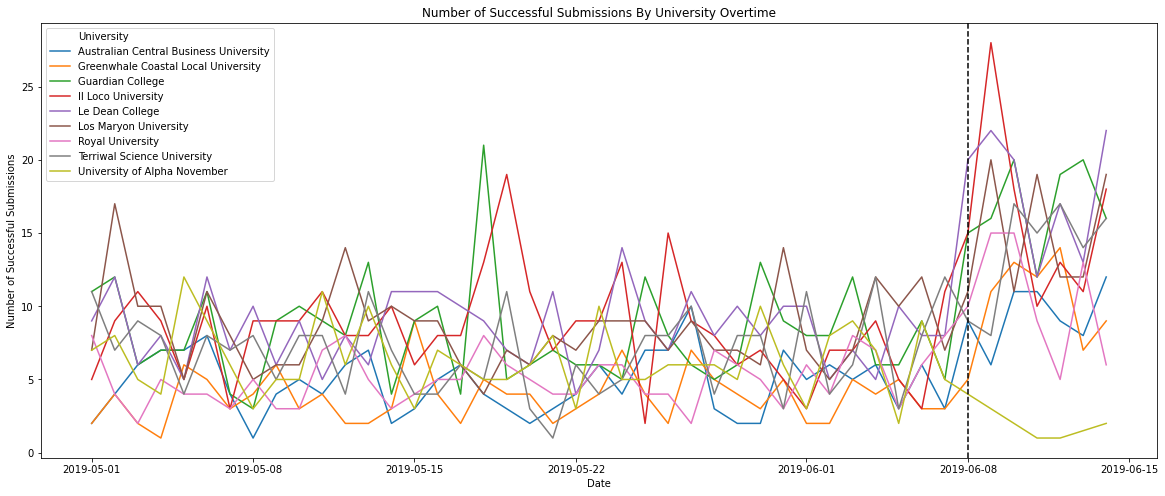

In [19]:
# Line graph showing successful submissions by university overtime
plt.figure(figsize=(20,8))
plt.title("Number of Successful Submissions By University Overtime")
sns.lineplot(data=submissions_by_uni_overtime, x='Log-In date', y='Submission count', 
             hue='University')
plt.axvline('2019-06-08', color = 'black', linestyle = '--')
plt.xlabel("Date")
plt.ylabel("Number of Successful Submissions")

Since the website change, successful submissions has increased for all universities except University of Alpha November. 

Next, I will explore the number of timeouts by university.

In [20]:
# Dataframe showing timeouts by university overtime
timeouts_by_uni_overtime = login_df[login_df['Timed out due to dormancy'] == 'Yes'
                                   ].groupby(['Log-In date', 'University'
                                             ]).agg({'Timed out due to dormancy': ['count']})
timeouts_by_uni_overtime.columns = ['Timeout count']
timeouts_by_uni_overtime = timeouts_by_uni_overtime.reset_index()

Text(0, 0.5, 'Number of Timeouts')

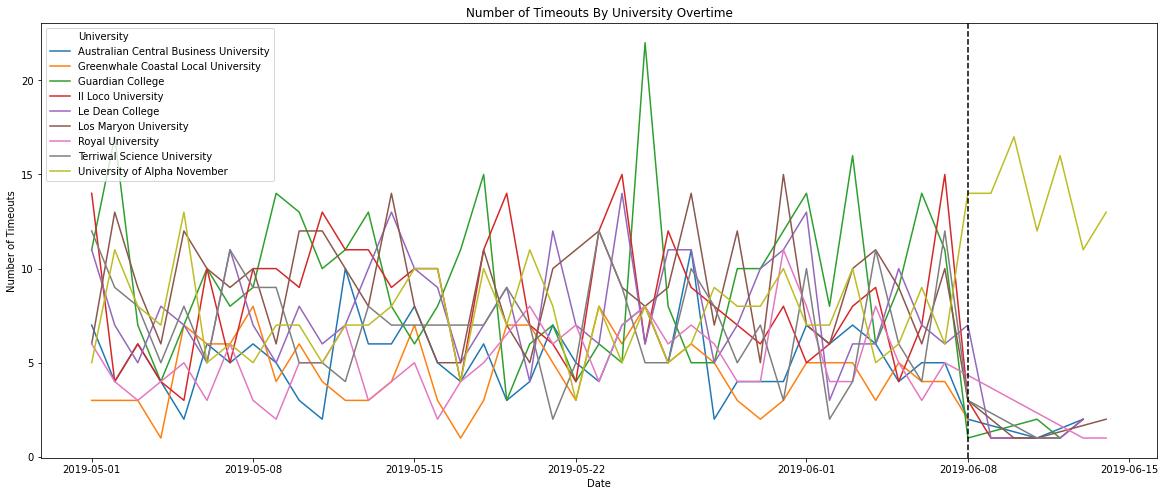

In [21]:
# Line graph showing timeouts by university overtime
plt.figure(figsize=(20,8))
plt.title("Number of Timeouts By University Overtime")
sns.lineplot(data=timeouts_by_uni_overtime, x='Log-In date', y='Timeout count', hue='University', legend='full')
plt.axvline('2019-06-08', color = 'black', linestyle = '--')
plt.xlabel("Date")
plt.ylabel("Number of Timeouts")

Since the website change, timeouts have decreased for all universities except University of Alpha November.

##   
## Conclusion

Overall, the Department for Student Support (DSS) website change has definitely improved user experience (UX). Specifically, the number of timeouts have decreased significantly from an average of 65 per day to 20 per day. In addition, the number of successful submissions has nearly doubled from an average of 60 per day to 110 per day. 

Despite the significant improvement in UX, the website can be further improved. I discovered numerous inconsistent university data entries that required standardization prior to analysis. In the future, I recommend the DSS implement a dropdown menu for students to input their university. This will ensure university names are consistent which will improve efficiency when performing future analysis. 

Another key insight I discovered from my analysis is that timeouts have increased and successful submissions have decreased for the University of Alpha November, since the website change. This may be due to the inconsistent university data entries. However, a deeper analysis may be necessary to determine why UX has worsened among University of Alpha November students. Ultimately, the new website application process is more effective than the original process, but further revisions should be made in future iterations of the website.